In [1]:
# Set up imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [9]:
# Function with many minima
def yfunc(x):
    return x**2 + np.sin(8*x)

xbase = np.linspace(-2, 2, 100)
ybase = yfunc(xbase)
#plt.plot(xbase, ybase)
#plt.show()

## Gradient descent?

We can try the known technique of gradient descent here.  It works -- but does not really find the global optimum.  It just goes to whichever is the nearest minimum, which could be quite far from the global optimum depending on your choice of starting point

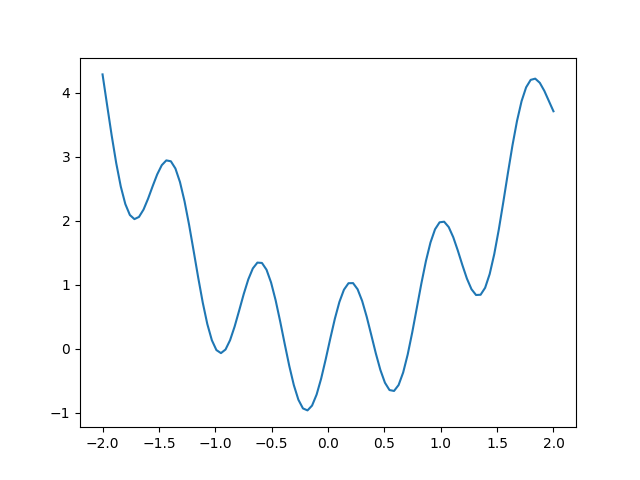

In [3]:
# Set up some large value for the best cost found so far
bestcost = 100000
# Generate several values within a search 'space' and check whether the new value is better
# than the best seen so far.
bestx = 1.1
rangemin, rangemax = -5, 5 
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

# Learning rate 
lr = 0.01

def yprimefunc(x):
    return 2 * x + 8 * np.cos(8*x)

def onestepderiv(frame):
    global bestcost, bestx, lr
    x = bestx - yprimefunc(bestx) * lr 
    bestx = x
    y = yfunc(x)
    lngood.set_data(x, y)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    # return lngood,

ani= FuncAnimation(fig, onestepderiv, frames=range(10), interval=1000, repeat=False)
plt.show()

## Annealing

The alternative is to use a random search approach.  However, as we already saw with simpler functions, random search can take you all over the place and take a long time to find the minimum.  Instead, it makes sense to initially search over a wide range, but as time goes on, reduce the range of values over which you are going to search.

The first thing here is to introduce the concept of a *Move*.  This is a change from the present position to some neighbouring position, where we hope the solution is better than it is here.  Initially we would like to take large steps and move around to explore, but as time goes on and we are near an optimum, we want to take smaller steps.

We do this by introducing a notion of *Temperature*.  Initially the temperature is high, and the step size is also high.  More importantly, even if the new cost becomes *worse* than the current cost, we are still willing to accept the move with a probability given by

$$P(\Delta E) = e^{-\frac{\Delta E}{kT}}$$

Here $\Delta E$ is the cost increase as a result of the new move, and $k$ is a constant (conceptually similar to Boltzmann's constant in statistical mechanics, which is where these ideas are inspired from).  $T$ is the present temperature.  Clearly, as $T$ decreases, the probability calculated above will tend towards $e^{-\infty} = 0$.

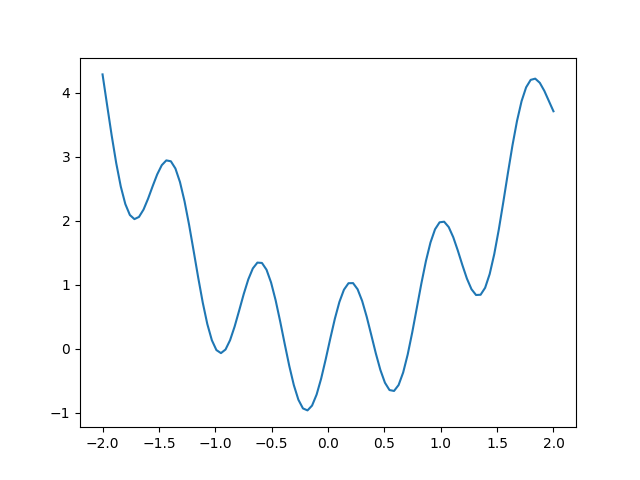

In [5]:
# Initial temperature
T = 3.0
decayrate = 0.95
# Set up some large value for the best cost found so far
bestcost = 100000
# Generate several values within a search 'space' and check whether the new value is better
# than the best seen so far.
bestx = -2
rangemin, rangemax = -2, 2 
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)
def onestep(frame):
    global bestcost, bestx, decayrate, T
    # Generate a random value \in -2, +2
    dx = (np.random.random_sample() - 0.5) * T
    x = bestx + dx
    # print(f"Old x = {x}, delta = {dx}")
    y = yfunc(x)
    if y < bestcost:
        # print(f"Improved from {bestcost} at {bestx} to {y} at {x}")
        bestcost = y
        bestx = x
        lngood.set_data(x, y)
    else:
        toss = np.random.random_sample()
        if toss < np.exp(-(y-bestcost)/T):
            bestcost = y
            bestx = x
            lngood.set_data(x, y)
        # print(f"New cost {y} worse than best so far: {bestcost}")
        pass
    T = T * decayrate
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    # return lngood,

ani= FuncAnimation(fig, onestep, frames=range(100), interval=100, repeat=False)
plt.show()

# Assignment

## Part 1 - Simple

Write a function that takes as input the following:

- another function (note that in Python you can pass functions as arguments to other functions)
- starting point
- temperature 
- learning/decay rate

and then proceeds to apply Simulated Annealing to minimize the function.  This is more or less the same as what has been given above, but you need to encapsulate it all into a simple function and demonstrate how it works on arbitrary functions.  

## Part 2 

Note that part 2 is also part of the regular assignment.  It is **not** optional, but is specified as a separate problem part to break the overall problem into portions in case you find this too hard to solve at one shot.  

The traveling salesman problem gives you a set of city locations (x, y coordinates).  Your goal is to find a route from a given starting point that visits all the cities exactly once and then returns to the origin, with the minimum total distance covered (distance is measured as Euclidean distance $\sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$).  

You will be given a file where the first line is the number of cities *N*, and the next *N* lines give the cities as a list of x, y coordinates: for example
```
4
0.0 1.5
2.3 6.1
4.2 1.3
2.1 4.5
```

Your goal is to give a sequence of numbers, for example `[0 3 2 1]` which specifies the order in which to visit the cities.  Note that after the last city you will come back to the first one in the list.  

Plot the cities with the path you have specified, and output the total length of the shortest path discovered so far.

## Report

You need to submit a .zip file that contains all your code (either notebook or plain Python files) and a PDF file (can be generated from the notebook) that clearly documents what you have implemented and how to run your code.  For part 1, you need to also show the output plot that shows how the search proceeded when run on the function given in the presentation.

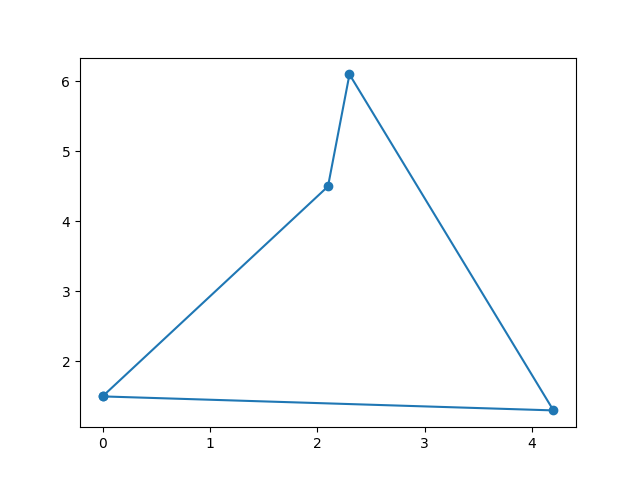

In [3]:
# Example Python input and plot
x_cities = np.array([0.0, 2.3, 4.2, 2.1])
y_cities = np.array([1.5, 6.1, 1.3, 4.5])
finalorder = [0, 3, 1, 2]

# Rearrange for plotting
xplot = x_cities[finalorder] 
yplot = y_cities[finalorder]
xplot = np.append(xplot, xplot[0])
yplot = np.append(yplot, yplot[0])
plt.plot(xplot, yplot, 'o-')
plt.show()

## Part 1

In [4]:
def SimuAnneal(func, start_p, temp, dray):
    n = 100 #number of iterations
    for i in range(n):
        #store = start_p
        xmin = start_p
        ymin = func(xmin)
        inc = (np.random.random_sample() -0.5) * temp
        start_p += inc
        ytemp = func(start_p)
        if ytemp < ymin:
            xmin = start_p
            ymin = ytemp
        else:
            rand = np.random.random_sample()
            if rand < np.exp( -(ytemp-ymin)/temp):
                xmin = start_p
                ymin = ytemp
        temp *= dray
    return xmin,ymin
print(SimuAnneal(yfunc,-2,3,0.95))

(0.3585845557984732, 0.3981237378149377)


## Part 2

## Traveling salesman 

I have used the 2-opt method of optimisation for optimising the above problem. In this approach we take two random points in a given path and if we see that the path betwwen them is intersecting, we flip the order, in order to remove the overlab. This reduces the overall cost and helps in optimising.

In [4]:
def dist(a,b): #This function returns the distance between 2 points
    return ((a[1]-b[1])**2 + (a[0]-b[0])**2)**0.5

def swap(l,i,j):
    return l[:i] + l[i:j+1][::-1] + l[j+1:]

The function defined above (i.e swap) takes a list and 2 integers as input. It then swaps inverts the subarray from the i'th element to the j'th element. This is one of the key steps in the 2-opt process that I have used for the optimisation of the given problem. 

In [11]:
def readfile(file): #This function reads the input file(i.e. the map with the coordinates of the cities)
    direct = open(file)
    coords = {}
    i=0
    for line in direct:
        line = line.strip()
        line = line.split()
        if(len(line)==2):
            coords[i] = [float(line[0]),float(line[1])]
        i+=1
    return coords #The output here is a dictionary with the city number as key and it's co-ordinates as the values 
#file = "10cities.txt"
#print(readfile(file))

In [12]:
def rando(n): # This function generates random permutations of n(i.e. the number of cities)
    a = []
    while(len(a)!=n):
        b = np.random.randint(1,n+1)
        if b not in a:
            a.append(b)
    return a

In [14]:
##### Using simulated annealing
def cost(path,pos): #A function to calaculate the cost of travelling a crtain path 
    add = 0
    n = len(path)
    for i in range(len(path)-1):
        a = path[i]
        b = path[i+1]
        add += dist(pos[a],pos[b])
    add += dist(pos[path[0]],pos[path[n-1]])
    return add
    
def tsp(citymap,temp,decay,n):
    pos = readfile(citymap) #generating a dictionary of cities and their co-ordinates
    node = len(pos)
    path = rando(node) #generating a random starting path
    bestr = path
    min_cost = cost(path,pos)
    for i in range(n):
        a,b = np.random.choice(range(node), 2, replace = False) #2 random cities
        path = swap(path,min(a,b),max(a,b))
        if cost(path,pos) < min_cost: #checking if swapping the paths actually decreases the cost
            min_cost = cost(path,pos)
            bestr = np.copy(path)
        else:
            rand = np.random.random_sample()
            if rand < np.exp(-(cost(path,pos)-min_cost)/temp):
                min_cost = cost(path,pos)
                bestr = np.copy(path)
            else:
                path = swap(path,min(a,b),max(a,b)) #if swapping is not favourable we go back to initial conditions
        temp = temp*decay #reducing the 'temperature'
    return bestr,min_cost

Above I have created a function which takes the following inputs
- Map (or co-ordinates of the cities)
- Temperature 
- Decay rate 
- Number of iterations
And uses the simulated annealing and the optimisation technique of 2-opt to find the route having least cost between the cities and the corresponding path. First we generate a random path. Then we choose any 2 random cities and swap the path between them. Then we use simulated annealing to decide whether the new path is the optimal path or not. 

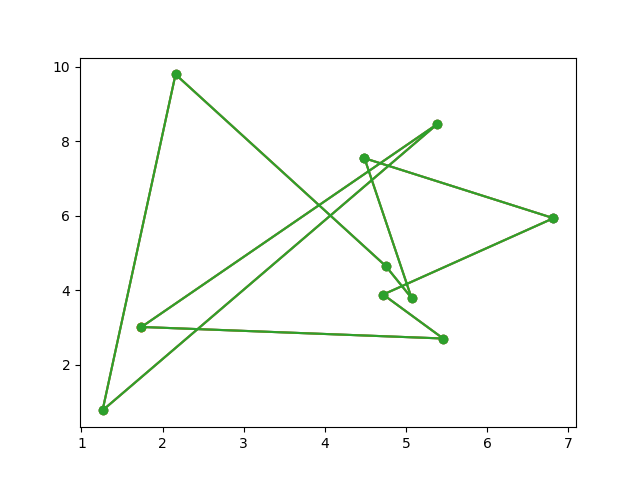

In [30]:
dmin = 1000    
for i in range(10): # I am running the functions multiple times here to get a better solution.
    c,d = tsp("100cities.txt")
    if d< dmin:
        dmin =d
        best = np.copy(c)
print(best,dmin)

pos = readfile("100cities.txt")
xfin = np.array([])
yfin = np.array([])
for i in best:
    xfin = np.append(xfin,pos[i][0])
    yfin = np.append(yfin,pos[i][1])
xfin = np.append(xfin,xfin[0])
yfin = np.append(yfin,yfin[0])
plt.plot(xfin,yfin,'o-')
plt.show()

## Dependency of final answer on different parameters

### Temperature
I have run the functon for 5 different values of temperature, with varying orders of magnitude and have made the following observations
- As I increase the temperature, the cost also increases. 
- But we cannot draw any concrete conclusions from the above observation because each one of them had a different starting point.

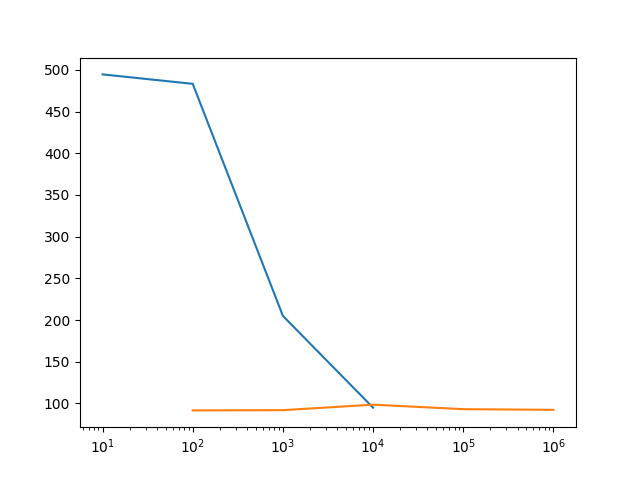

In [24]:
xbase = [100,1000,10000,100000,1000000]
ybase = [91.66093511208241, 91.95145845888916, 98.536846907443, 93.14018179258659, 92.3397757674438]
plt.plot(xbase,ybase)
plt.xscale('log')
plt.show()

### Number of iterations
I have taken 4 different values of iterations and have made the observation that as we increase the umber of iterations we get better solutions. 

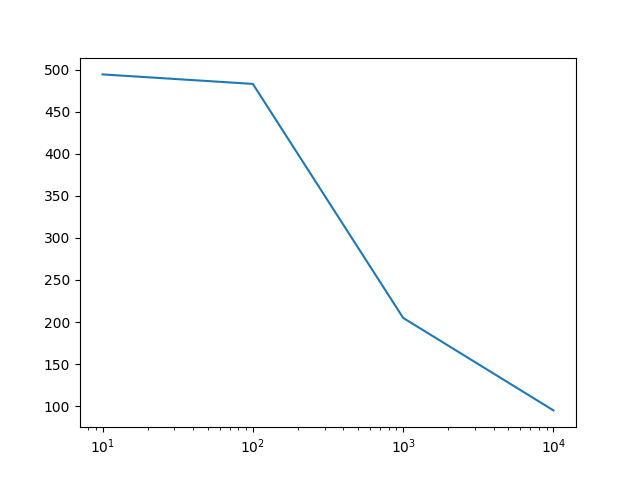

In [23]:
plt.close()
xbase = [10,100,1000,10000] 
ybase = [494.48821529505267, 483.17951130781023, 204.94209678463423, 94.91196269204058]
plt.plot(xbase,ybase)
plt.xscale('log')
